# Systemy uczące się - Algorytm oczekiwanie-maksymalizacja

### Ćwiczenie 1 - implementacja k-means
Wygeneruj zbiór danych

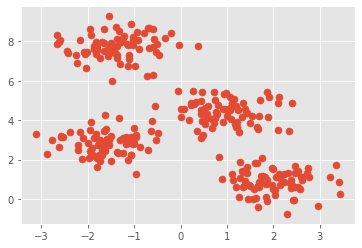

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Algorytm k-średnich, zaraz po inicjalizacji początkowych wartości centroidów, składa się z 2 podstawowych, powtarzanych iteracyjnie kroków:
- *expectation* - przypisanie każdego elementu zbiory danych do najbliższego centroidu
- *maximization* - aktualizacja centroidów. Centroid jest wyznaczany jako średnia arytmetyczna po wszystkich przypisanych do niego punktach

Zaimplementuj ten algorytm. W implementacji może być pomocna funkcja `pairwise_distances_argmin` [[dokumentacja]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html)

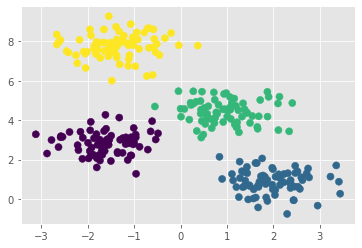

In [2]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, k, *, eps=1e-6, max_iter=100, metric='euclidean'):
    """Znajduje skupienia algorytmem k-średnich
     X - zbiór danych
     k - liczba szukanych grup
     Na wyjście zwracany jest wektor zawierający przypisania każdego elementu z X do skupienia
     np. [0,1,1] dla 3-elementowego X i k=2 oznacza że pierwszy element należy
     do grupy pierwszej, a element drugi i trzeci należą do grupy drugiej.
     """
    points = last_points = X[np.random.choice(len(X), size=k, replace=False)]
    for i in range(max_iter):
        labels = pairwise_distances_argmin(X, points, axis=1, metric=metric)
        points = np.array([np.mean(X[labels == i], axis=0) if np.any(labels == i) else points[i] for i in range(k)])
        if np.all(np.abs(last_points - points) < eps): break
        last_points = points
    return labels

def plot_kmeans(X, k):
    labels = find_clusters(X, k)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
    
plot_kmeans(X, 4)

Przetestuj działanie metody dla innych danych:
```
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
```
oraz
```
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
```
czy algorytm k-średnich potrafi je zgrupować w sposób zgodny z oczekiwaniami? Jakie rodzaje kształtów potrafi wykrywać algorytm k-średnich?


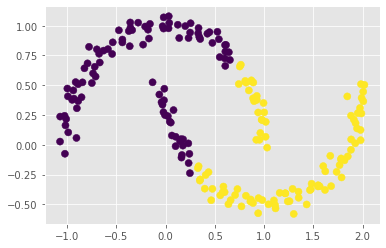

In [3]:
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
plot_kmeans(X, 2)

Przetesuj działanie profesjonalnej implementacji algorytm k-średnich z pakietu sklearn
```
from sklearn.cluster import KMeans
```
ponieważ problem jest nienadzorowany, funkcja `fit()` przyjmie tylko jeden argument (`X`). Liczbę grup możesz określić poprzez parametr konstruktora `n_clusters = 5`. Przypisanie obserwacji do poszczególnych grup możesz odczytać z włąściwości `labels_` wytrenowanego obiektu `KMeans`. Narysuj wynik grupowania.

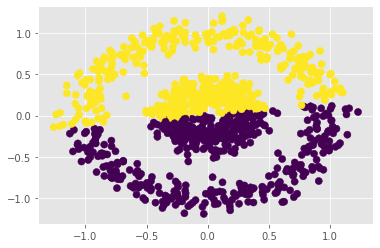

In [4]:
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
plot_kmeans(X, 2)

O algorytmie k-średnich często mówi się, że wykrywa skupiska sferyczne.
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Sprawdź tę hipotezę na podanych trudniejszych danych sferycznych (no właśnie czy są one sferyczne?). Czy nawet gdyby wybrać centroidy jako prawdziwe centra skupisk, otrzymalibyśmy prawidłowe grupowanie? Dlaczego?

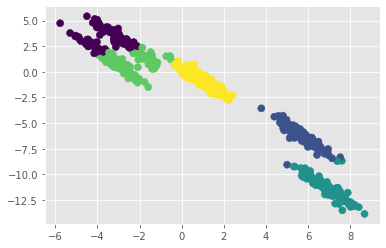

In [5]:
from helpers import get_quasispherical_data
X = get_quasispherical_data()
plot_kmeans(X, 5)

**Ćwiczenia**
- Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o specyfice rozwiązowanego problemu i algortmie k-średnich jako algorytmie optymalizacyjnym?
- Twój algorytm uruchamiałeś z apriori znaną liczbą grup $k=4$, przetestuj działanie algorytmu dla $k=5$. Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o algortmie k-średnich jako algorytmie optymalizacyjnym?
- Jak w praktyce możemy próbować choć trochę ograniczyć problem algorytmu dot. utykania w minimach lokalnych?


## Zadanie 2 - parametry wielowymiarowego rozkładu normalnego

Poniższy kod służy do rysowania dwuwymiarowego rozkładu normalnego o wektorze średnich $[0,0]$ i macierzy kowariancji równej $[[1, 0], [0, 1]]$

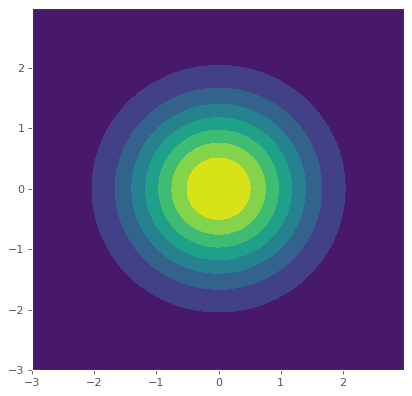

In [6]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure

def plot_normal_2d(loc, sd):
    figure(figsize=(6, 6), dpi=80)
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    points = np.dstack((x, y))
    normal = multivariate_normal(loc, sd)
    densities = normal.pdf(points)
    plt.contourf(x, y, densities)

plot_normal_2d([0, 0], [[1, 0], [0, 1]])

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmienisz wektor średnich  na np. $[1,0]$


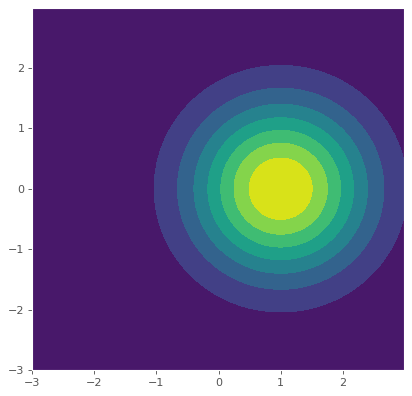

In [7]:
plot_normal_2d([1, 0], [[1, 0], [0, 1]])

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na wielokrotność macierzy jednostkowej. (Warto wrócić do oryginalnego ustawienia wektora średnich, aby wycentrować wykres)

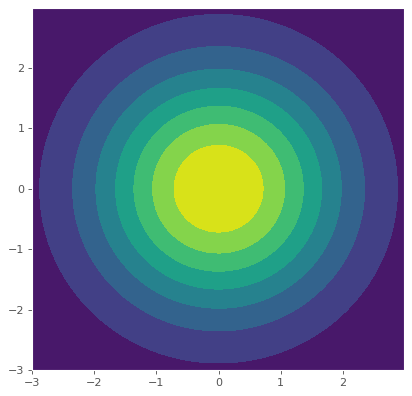

In [8]:
plot_normal_2d([0, 0], [[2, 0], [0, 2]])

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz diagonalną

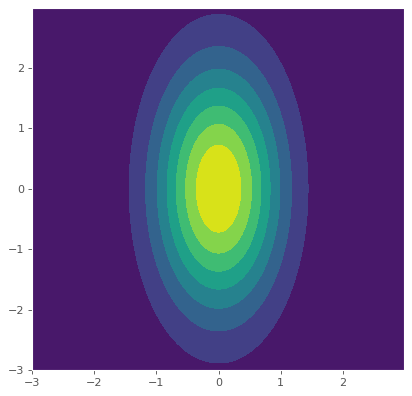

In [9]:
plot_normal_2d([0, 0], [[0.5, 0], [0, 2]])

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz symetryczną np. $[[1, 0.9], [0.9, 1]]$

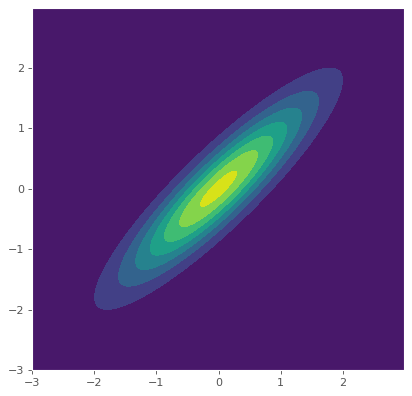

In [10]:
plot_normal_2d([0, 0], [[1, 0.9], [0.9, 1]])

Macierz kowariancji musi być symetryczna, jednak sama własność symetryczności macierzy nie wystarcza. Spróbuj zwizualizować rozkład o macierzy $[[1, 1], [1, 1]]$. Dlaczego nie jest to możliwe? Wyjaśnij używając zarówno formalizmu matematycznego jak i intuicji. (Jak wyglądałby wykres takiego rozkładu?)

In [11]:
#plot_normal_2d([0, 0], np.ones((2, 2)))

Korzystając z funkcji `multivariate_normal`, zwizualizuj mieszaninę dwóch rozkładów normalnych:
$$P(x) = \tau N(x; \mu_1, \Sigma_1) + (1-\tau) N(x; \mu_2, \Sigma_2) $$

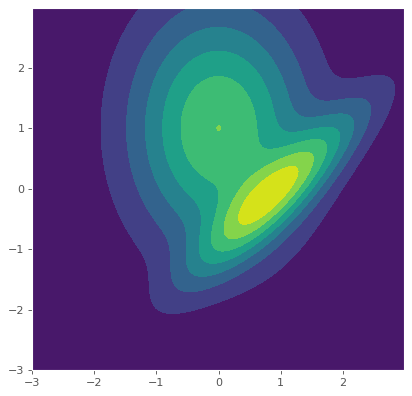

In [12]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
t = 0.2
n1 = multivariate_normal([1, 0], [[1, 0.9], [0.9, 1]])
n2 = multivariate_normal([0, 1], [[1, 0], [0, 2]])
d1 = n1.pdf(points)
d2 = n2.pdf(points)
densities = t*d1 + (1-t)*d2
plt.contourf(x, y, densities)

**Ćwiczenia**
1. Poeksperymentuj z różnymi ustawieniami mieszaniny. Na co wpływa parametr $\tau$?
2. Rozważając mieszaninę rozkładów normalnych o dowolnej liczbie komponentów - czy istnieją rozkłady, których nie można zamodelować? Odpowiedź uzasadnij używając zdobytych intuicji.

## Zadanie 3 - EM dla mieszaniny jednowymiarowej
Dane są dane wygenerowane z poniższej mieszaniny rozkładów normalnych:

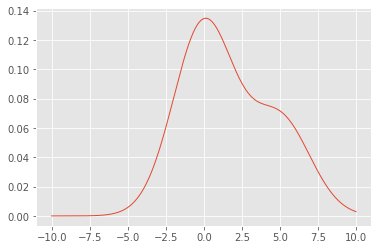

In [13]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, 0.66*norm.pdf(x_axis,0,2) + 0.33* norm.pdf(x_axis,5,2))
plt.show()

data = np.concatenate((np.random.normal(0,2, 66), np.random.normal(5,2, 33)))

Zwizualizuj dane na histogramie. Zwróć uwagę, że dobór odpowiednich $\mu_1, \mu_2, \sigma_1, \sigma_2$ na podstawie danych nie jest oczywisty

(array([ 1.,  3., 12., 18., 21., 13., 16.,  9.,  4.,  2.]),
 array([-5.83520821, -4.30480923, -2.77441025, -1.24401126,  0.28638772,
         1.8167867 ,  3.34718568,  4.87758466,  6.40798364,  7.93838262,
         9.4687816 ]),
 <BarContainer object of 10 artists>)

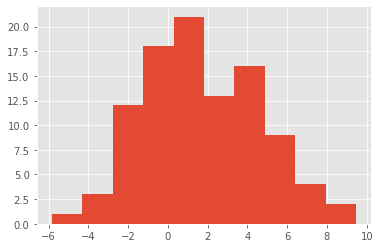

In [14]:
plt.hist(data)

Zaimplementuj algorytm EM dla powyższego problemu. Zwizualizuj kolejne kroki algorytmu (tj. narysuj wykres mikstury co kilka iteracji)

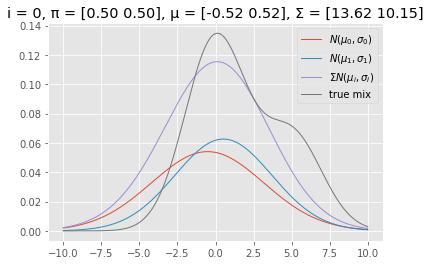

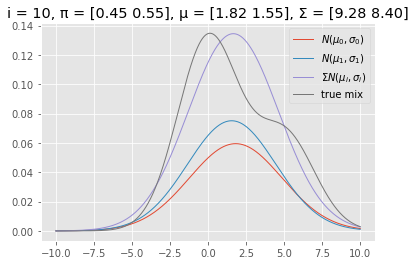

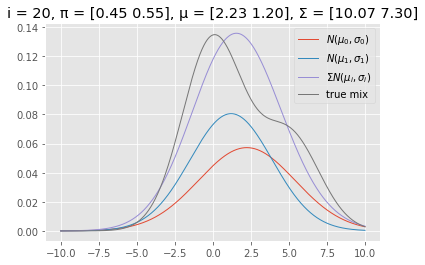

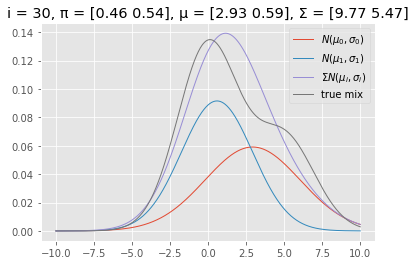

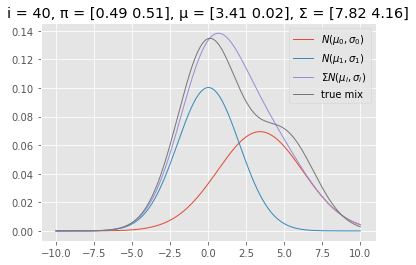

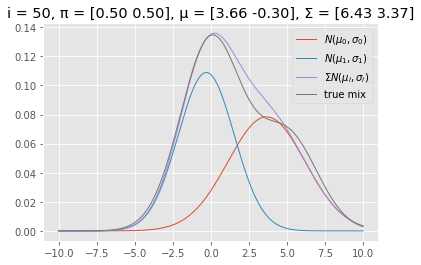

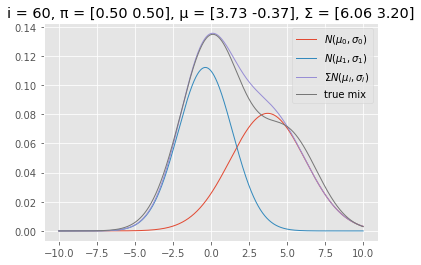

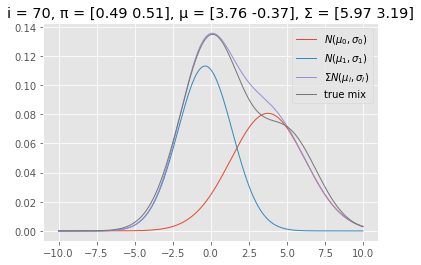

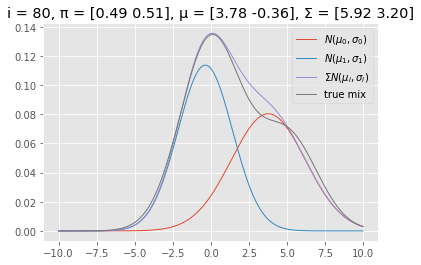

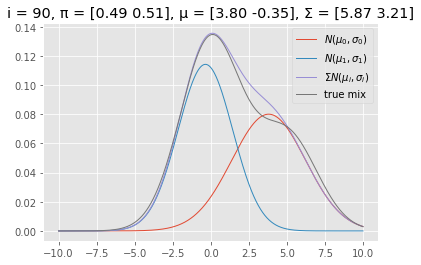

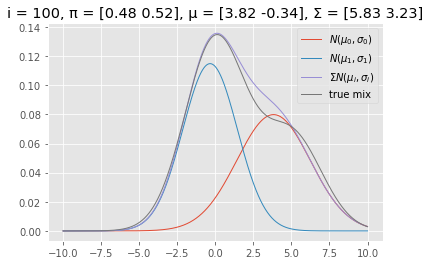

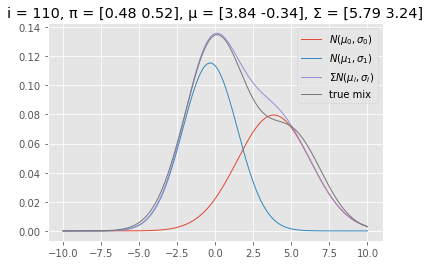

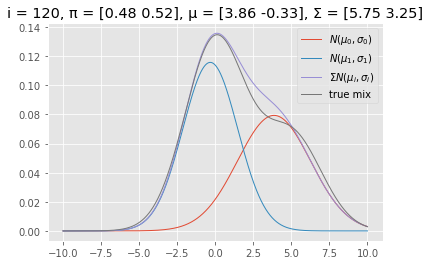

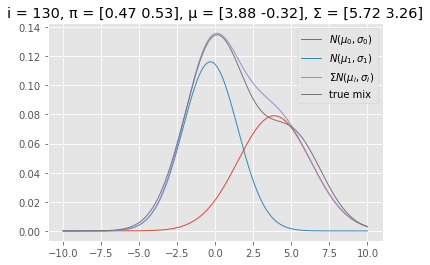

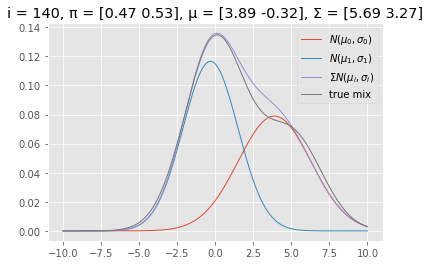

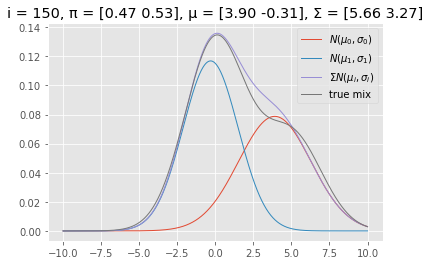

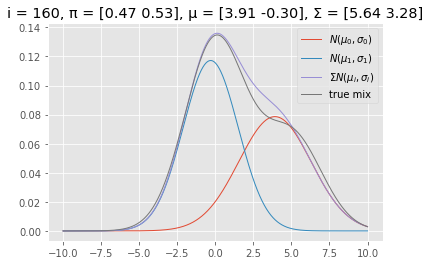

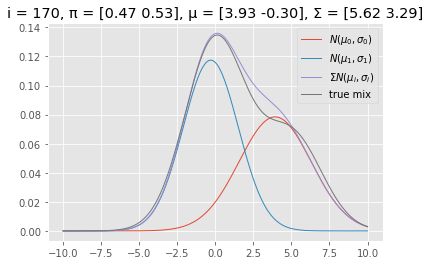

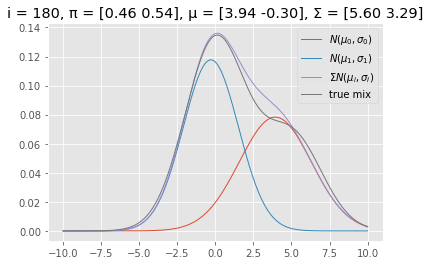

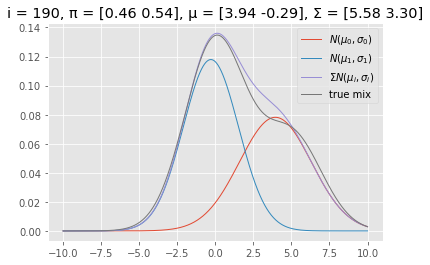

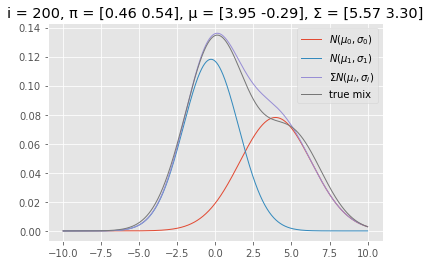

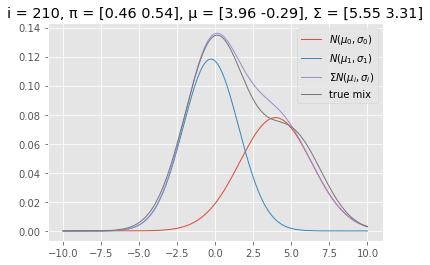

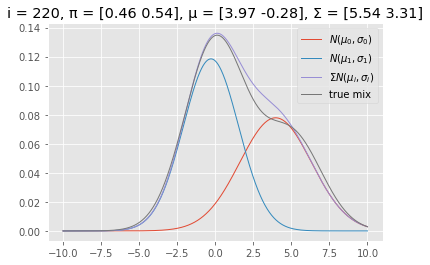

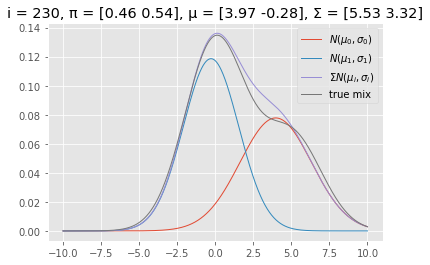

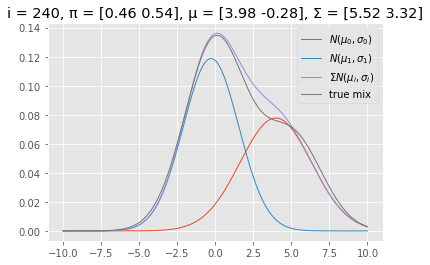

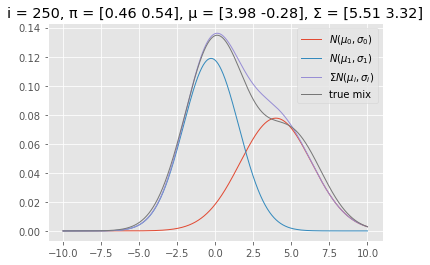

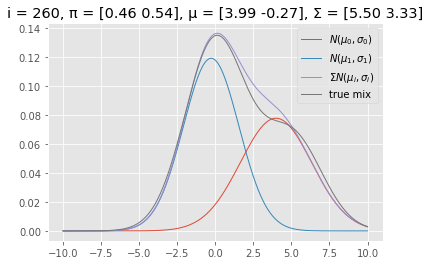

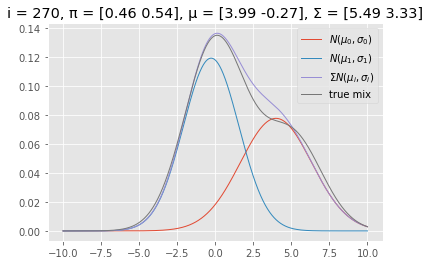

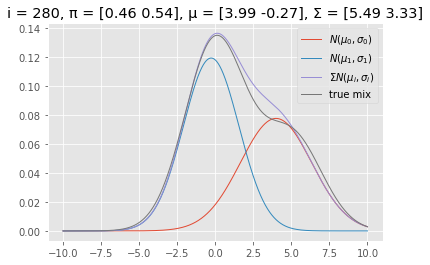

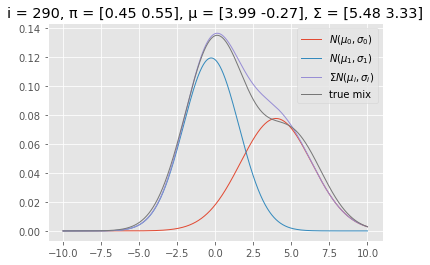

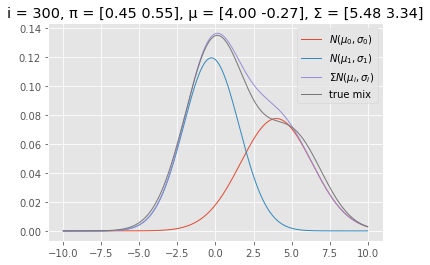

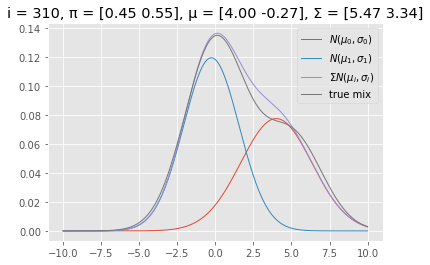

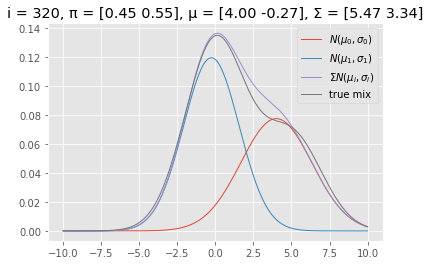

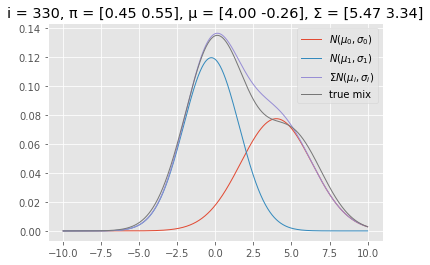

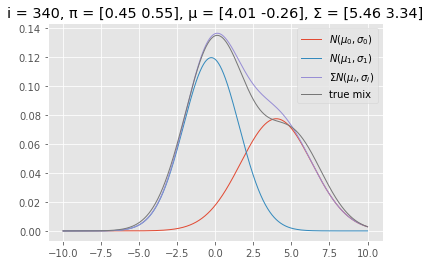

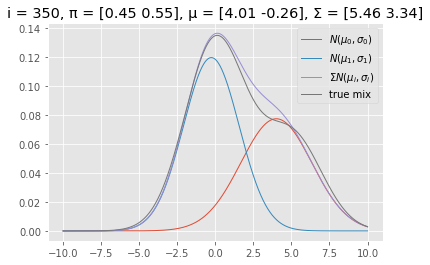

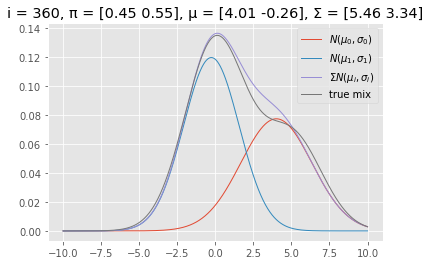

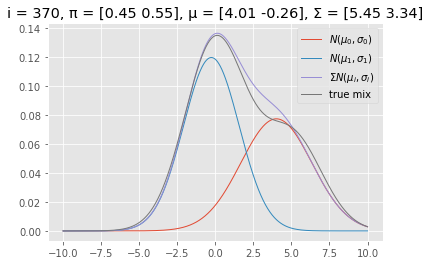

early stopping after 379 iters


(array([[0.45],
        [0.55]]),
 array([[4.01],
        [-0.26]]),
 array([[5.45],
        [3.34]]))

In [15]:
np.set_printoptions(formatter=dict(float_kind='{:.2f}'.format))

def gmm_debug_plot(i, k, π, μ, Σ, freq=10):
    if i % freq != 0: return
    plt.subplots()
    plt.title(f'i = {i}, π = {π.reshape(-1)}, μ = {μ.reshape(-1)}, Σ = {Σ.reshape(-1)}')
    tot = np.zeros_like(x_axis)
    for i in range(k):
        ys = π[i]*norm.pdf(x_axis, μ[i], np.sqrt(Σ[i]))
        tot += ys
        plt.plot(x_axis, ys, label=f'$N(\mu_{i}, \sigma_{i})$')
    plt.plot(x_axis, tot, label='$\Sigma N(\mu_i,\sigma_i)$')
    plt.plot(x_axis, 0.66*norm.pdf(x_axis,0,2) + 0.33*norm.pdf(x_axis,5,2), label='true mix')
    plt.legend(loc='upper right')
    plt.show()

def my_gmm(X, k, *, max_iters=1000, eps=1e-6):
    π = np.ones((k, 1))/k
    μ = np.random.choice(X, k)[:,np.newaxis]
    Σ = ((X - μ)**2).mean(1, keepdims=True)

    for i in range(max_iters):
        gmm_debug_plot(i, k, π, μ, Σ)

        w = π * norm.pdf(X, μ, np.sqrt(Σ))
        w /= w.sum(0)
        π1 = w.mean(1, keepdims=True)

        Nk = w.sum(1)[:,np.newaxis]
        μ1 = (w*X).sum(1, keepdims=True) / Nk
        Σ1 = (w*(X - μ)**2).sum(1, keepdims=True) / Nk
        
        if np.all((np.abs(π - π1) + np.abs(μ - μ1) + np.abs(Σ - Σ1))/3 < eps):
            print(f'early stopping after {i} iters')
            break
            
        π, μ, Σ = π1, μ1, Σ1
        
    return π, μ, Σ
    
my_gmm(data, k=2, eps=1e-4)

Skorzystaj z gotowej implementacji EM-GMM w pakiecie `sklearn` dla danych z elipsami:
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Czy algorytm EM lepiej poradził sobie z tymi danymi niż k-Means?

Tak, ale zależy od losowej inicjalizacji

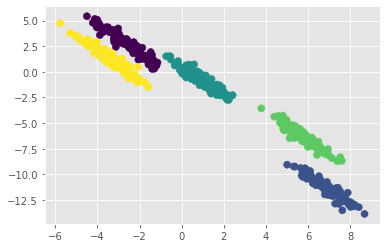

In [34]:
from sklearn.mixture import GaussianMixture
from helpers import get_quasispherical_data
X = get_quasispherical_data()
gmm = GaussianMixture(n_components=5)
labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Wykonaj proces strojenia parametru $K$ metody EM-GMM poprzez narysowanie wykresu funkcji wiarygodności dla różnych $K$ na zbiorze uczącym i testowym. Sprawdź czy wybrana liczba elementów mikstury odpowiada intuicji.

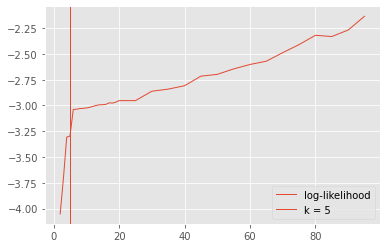

In [35]:
ks = list(np.arange(2, 20)) + list(np.arange(20, 100, 5))
ys = []
for k in ks:
    gmm = GaussianMixture(n_components=k)
    gmm.fit_predict(X)
    ys.append(gmm.score(X))
    
plt.plot(ks, ys, label='log-likelihood')
plt.axvline(5, label='k = 5')
plt.legend(loc='lower right')
plt.show()